In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [306]:
data=pd.read_csv("airline-passengers.csv")

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [308]:
data["Month"] = pd.to_datetime(data["Month"])

In [309]:
data.set_index("Month",inplace=True)

In [310]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [311]:
data.shape

(144, 1)

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [313]:
data["t+1"] = data["Passengers"].shift(-1)

In [314]:
data

,Passengers,t+1
Month,,
1949-01-01,112,118.0
1949-02-01,118,132.0
1949-03-01,132,129.0
1949-04-01,129,121.0
1949-05-01,121,135.0
...,...,...
1960-08-01,606,508.0
1960-09-01,508,461.0
1960-10-01,461,390.0


In [315]:
data = data[:-1]

In [316]:
data

,Passengers,t+1
Month,,
1949-01-01,112,118.0
1949-02-01,118,132.0
1949-03-01,132,129.0
1949-04-01,129,121.0
1949-05-01,121,135.0
...,...,...
1960-07-01,622,606.0
1960-08-01,606,508.0
1960-09-01,508,461.0


In [317]:
data.shape

(143, 2)

In [318]:
X=data["Passengers"].values.reshape(-1,1,1)
y=data["t+1"].values.reshape(-1,1,1)

split_index = int(len(data) * 0.8)
X_train = X[:split_index] 
X_test = X[split_index:] 
y_train = y[:split_index]
y_test = y[split_index:]

In [319]:
X_train

array([[[112]],

       [[118]],

       [[132]],

       [[129]],

       [[121]],

       [[135]],

       [[148]],

       [[148]],

       [[136]],

       [[119]],

       [[104]],

       [[118]],

       [[115]],

       [[126]],

       [[141]],

       [[135]],

       [[125]],

       [[149]],

       [[170]],

       [[170]],

       [[158]],

       [[133]],

       [[114]],

       [[140]],

       [[145]],

       [[150]],

       [[178]],

       [[163]],

       [[172]],

       [[178]],

       [[199]],

       [[199]],

       [[184]],

       [[162]],

       [[146]],

       [[166]],

       [[171]],

       [[180]],

       [[193]],

       [[181]],

       [[183]],

       [[218]],

       [[230]],

       [[242]],

       [[209]],

       [[191]],

       [[172]],

       [[194]],

       [[196]],

       [[196]],

       [[236]],

       [[235]],

       [[229]],

       [[243]],

       [[264]],

       [[272]],

       [[237]],

       [[211]],

       [[180]]

In [320]:
X_test

array([[[491]],

       [[505]],

       [[404]],

       [[359]],

       [[310]],

       [[337]],

       [[360]],

       [[342]],

       [[406]],

       [[396]],

       [[420]],

       [[472]],

       [[548]],

       [[559]],

       [[463]],

       [[407]],

       [[362]],

       [[405]],

       [[417]],

       [[391]],

       [[419]],

       [[461]],

       [[472]],

       [[535]],

       [[622]],

       [[606]],

       [[508]],

       [[461]],

       [[390]]], dtype=int64)

In [321]:
y_train

array([[[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

       [[104.]],

       [[118.]],

       [[115.]],

       [[126.]],

       [[141.]],

       [[135.]],

       [[125.]],

       [[149.]],

       [[170.]],

       [[170.]],

       [[158.]],

       [[133.]],

       [[114.]],

       [[140.]],

       [[145.]],

       [[150.]],

       [[178.]],

       [[163.]],

       [[172.]],

       [[178.]],

       [[199.]],

       [[199.]],

       [[184.]],

       [[162.]],

       [[146.]],

       [[166.]],

       [[171.]],

       [[180.]],

       [[193.]],

       [[181.]],

       [[183.]],

       [[218.]],

       [[230.]],

       [[242.]],

       [[209.]],

       [[191.]],

       [[172.]],

       [[194.]],

       [[196.]],

       [[196.]],

       [[236.]],

       [[235.]],

       [[229.]],

       [[243.]],

       [[264.]],

       [[272.]],

       [[2

In [322]:
y_test

array([[[505.]],

       [[404.]],

       [[359.]],

       [[310.]],

       [[337.]],

       [[360.]],

       [[342.]],

       [[406.]],

       [[396.]],

       [[420.]],

       [[472.]],

       [[548.]],

       [[559.]],

       [[463.]],

       [[407.]],

       [[362.]],

       [[405.]],

       [[417.]],

       [[391.]],

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])

# Adam Model

### Model 1

In [323]:
model_adam = Sequential()
model_adam.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
model_adam.add(Dense(units=1))
model_adam.compile(optimizer='adam', loss='mean_squared_error')

history = model_adam.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
114/114 [==============================] - 2s 7ms/step - loss: 63294.9316
Epoch 2/100
114/114 [==============================] - 1s 7ms/step - loss: 16671.5035
Epoch 3/100
114/114 [==============================] - 1s 7ms/step - loss: 909.7178
Epoch 4/100
114/114 [==============================] - 1s 6ms/step - loss: 697.5486
Epoch 5/100
114/114 [==============================] - 1s 6ms/step - loss: 690.3164
Epoch 6/100
114/114 [==============================] - 1s 6ms/step - loss: 626.4738
Epoch 7/100
114/114 [==============================] - 1s 7ms/step - loss: 706.7927
Epoch 8/100
114/114 [==============================] - 1s 6ms/step - loss: 704.5881
Epoch 9/100
114/114 [==============================] - 1s 6ms/step - loss: 901.1245
Epoch 10/100
114/114 [==============================] - 1s 7ms/step - loss: 646.6355
Epoch 11/100
114/114 [==============================] - 1s 7ms/step - loss: 730.3462
Epoch 12/100
114/114 [==============================] - 1s 6ms/step - 

114/114 [==============================] - 1s 6ms/step - loss: 756.7691
Epoch 96/100
114/114 [==============================] - 1s 6ms/step - loss: 605.3865
Epoch 97/100
114/114 [==============================] - 1s 6ms/step - loss: 890.7262
Epoch 98/100
114/114 [==============================] - 1s 6ms/step - loss: 763.4826
Epoch 99/100
114/114 [==============================] - 1s 6ms/step - loss: 656.5250
Epoch 100/100
114/114 [==============================] - 1s 7ms/step - loss: 829.3113


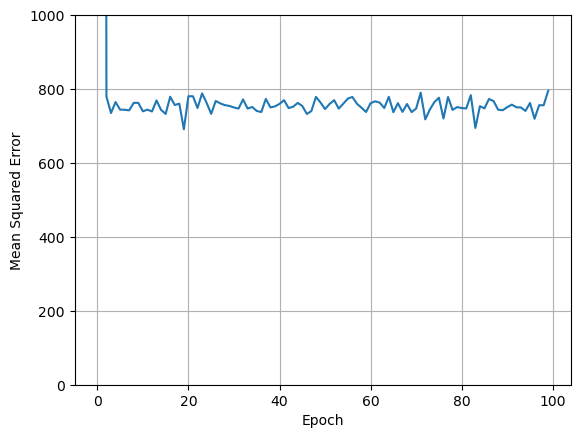

In [324]:
plt.plot(history.history['loss'], label='loss')
plt.ylim([0, 1000])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
#plt.legend()
plt.grid(True)

In [325]:
test_pred=model_adam.predict(X_test)

In [326]:
(test_pred)

array([[483.03156],
       [496.7348 ],
       [397.8757 ],
       [353.8296 ],
       [305.86823],
       [332.2959 ],
       [354.80838],
       [337.18988],
       [399.8333 ],
       [390.0453 ],
       [413.53653],
       [464.43436],
       [538.8233 ],
       [549.5902 ],
       [455.62506],
       [400.81213],
       [356.76596],
       [398.85452],
       [410.60013],
       [385.15128],
       [412.5577 ],
       [453.66745],
       [464.43436],
       [526.0989 ],
       [611.2548 ],
       [595.59393],
       [499.67123],
       [453.66745],
       [384.1725 ]], dtype=float32)

In [327]:
(y_test)

array([[[505.]],

       [[404.]],

       [[359.]],

       [[310.]],

       [[337.]],

       [[360.]],

       [[342.]],

       [[406.]],

       [[396.]],

       [[420.]],

       [[472.]],

       [[548.]],

       [[559.]],

       [[463.]],

       [[407.]],

       [[362.]],

       [[405.]],

       [[417.]],

       [[391.]],

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])

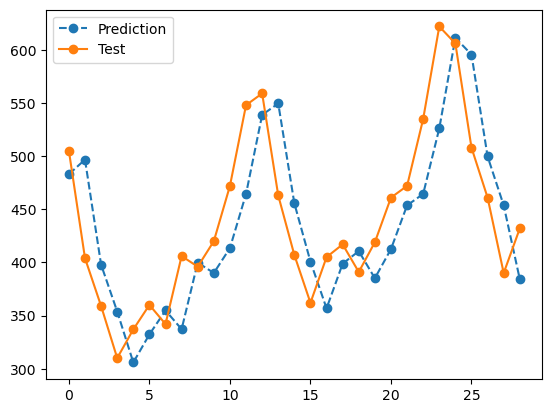

In [328]:
plt.plot(test_pred.reshape(-1,1),marker='o', linestyle='--',label="Prediction")
plt.plot(y_test.reshape(-1,1),marker='o', linestyle='-',label="Test")
plt.legend()

In [329]:
adf_pred=model_adam.predict(data["Passengers"].values.reshape(-1,1,1))

In [330]:
adf_pred

array([[112.045074],
       [117.92431 ],
       [131.6357  ],
       [128.69809 ],
       [120.86311 ],
       [134.5731  ],
       [147.30016 ],
       [147.30016 ],
       [135.55219 ],
       [118.90396 ],
       [104.201385],
       [117.92431 ],
       [114.985   ],
       [125.76025 ],
       [140.44739 ],
       [134.5731  ],
       [124.7809  ],
       [148.27908 ],
       [168.83531 ],
       [168.83531 ],
       [157.08913 ],
       [132.61485 ],
       [114.0051  ],
       [139.46838 ],
       [144.36331 ],
       [149.258   ],
       [176.66594 ],
       [161.98341 ],
       [170.79298 ],
       [176.66594 ],
       [197.22101 ],
       [197.22101 ],
       [182.53883 ],
       [161.00458 ],
       [145.34227 ],
       [164.91997 ],
       [169.81415 ],
       [178.62357 ],
       [191.34814 ],
       [179.6024  ],
       [181.56003 ],
       [215.81833 ],
       [227.56395 ],
       [239.30959 ],
       [207.00906 ],
       [189.39053 ],
       [170.79298 ],
       [192.3

In [331]:
df=pd.DataFrame(adf_pred,index=data.index)

In [332]:
df

,0
Month,
1949-01-01,112.045074
1949-02-01,117.924309
1949-03-01,131.635696
1949-04-01,128.698090
1949-05-01,120.863113
...,...
1960-07-01,611.254822
1960-08-01,595.593933
1960-09-01,499.671234


In [333]:
data

,Passengers,t+1
Month,,
1949-01-01,112,118.0
1949-02-01,118,132.0
1949-03-01,132,129.0
1949-04-01,129,121.0
1949-05-01,121,135.0
...,...,...
1960-07-01,622,606.0
1960-08-01,606,508.0
1960-09-01,508,461.0


In [334]:
df

,0
Month,
1949-01-01,112.045074
1949-02-01,117.924309
1949-03-01,131.635696
1949-04-01,128.698090
1949-05-01,120.863113
...,...
1960-07-01,611.254822
1960-08-01,595.593933
1960-09-01,499.671234


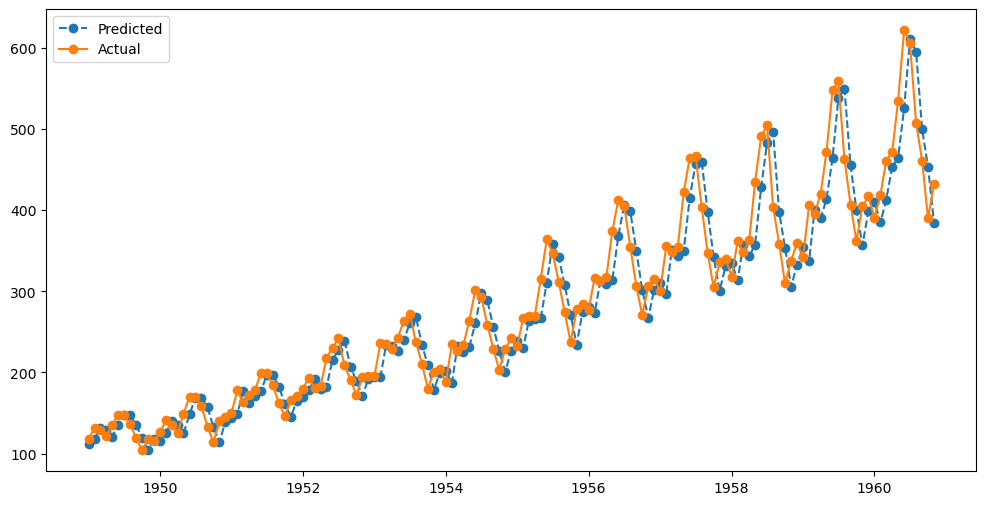

In [335]:
plt.figure(figsize=(12,6))
plt.plot(df,linestyle='--',marker='o',label='Predicted')
#plt.ylim(0,300)
plt.plot(data["t+1"], linestyle='-',marker='o',label='Actual')
plt.legend()

### Model 2

In [336]:
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(1, 1)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=3)

Epoch 1/100
38/38 [==============================] - 1s 7ms/step - loss: 64561.0421
Epoch 2/100
38/38 [==============================] - 0s 7ms/step - loss: 44081.1582
Epoch 3/100
38/38 [==============================] - 0s 8ms/step - loss: 9806.3746
Epoch 4/100
38/38 [==============================] - 0s 7ms/step - loss: 876.5810
Epoch 5/100
38/38 [==============================] - 0s 7ms/step - loss: 768.6822
Epoch 6/100
38/38 [==============================] - 0s 7ms/step - loss: 747.0604
Epoch 7/100
38/38 [==============================] - 0s 8ms/step - loss: 708.7943
Epoch 8/100
38/38 [==============================] - 0s 7ms/step - loss: 1015.9967
Epoch 9/100
38/38 [==============================] - 0s 7ms/step - loss: 818.4048
Epoch 10/100
38/38 [==============================] - 0s 6ms/step - loss: 702.5362
Epoch 11/100
38/38 [==============================] - 0s 6ms/step - loss: 741.9923
Epoch 12/100
38/38 [==============================] - 0s 6ms/step - loss: 753.4987
Epoch 1

38/38 [==============================] - 0s 6ms/step - loss: 544.7901
Epoch 98/100
38/38 [==============================] - 0s 7ms/step - loss: 798.4862
Epoch 99/100
38/38 [==============================] - 0s 6ms/step - loss: 765.0235
Epoch 100/100
38/38 [==============================] - 0s 6ms/step - loss: 647.3754


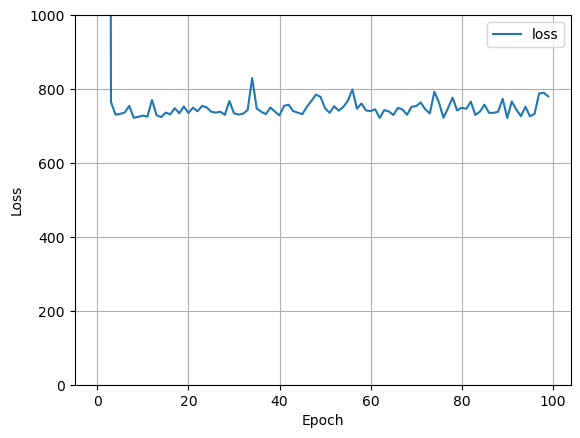

In [337]:
plt.plot(history.history['loss'], label='loss')
plt.ylim([0, 1000])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [338]:
t_pred=model.predict(X_test)

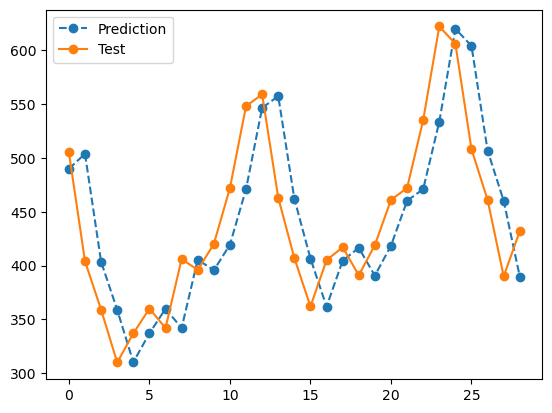

In [339]:
plt.plot(t_pred.reshape(-1,1),marker='o', linestyle='--',label="Prediction")
plt.plot(y_test.reshape(-1,1),marker='o', linestyle='-',label="Test")
plt.legend()

In [340]:
pred=model.predict(data["Passengers"].values.reshape(-1,1,1))

In [341]:
pred

array([[113.755356],
       [119.71506 ],
       [133.61502 ],
       [130.63695 ],
       [122.69418 ],
       [136.59291 ],
       [149.4956  ],
       [149.4956  ],
       [137.58551 ],
       [120.70813 ],
       [105.80499 ],
       [119.71506 ],
       [116.73546 ],
       [127.658646],
       [142.54825 ],
       [136.59291 ],
       [126.66582 ],
       [150.48804 ],
       [171.32819 ],
       [171.32819 ],
       [159.41975 ],
       [134.60768 ],
       [115.74216 ],
       [141.55573 ],
       [146.51822 ],
       [151.48047 ],
       [179.267   ],
       [164.38167 ],
       [173.31293 ],
       [179.267   ],
       [200.10603 ],
       [200.10603 ],
       [185.22104 ],
       [163.38928 ],
       [147.5107  ],
       [167.35876 ],
       [172.32056 ],
       [181.25168 ],
       [194.15205 ],
       [182.24403 ],
       [184.2287  ],
       [218.96028 ],
       [230.8682  ],
       [242.77611 ],
       [210.02933 ],
       [192.16739 ],
       [173.31293 ],
       [195.1

In [342]:
data["t+1"]

Month
1949-01-01    118.0
1949-02-01    132.0
1949-03-01    129.0
1949-04-01    121.0
1949-05-01    135.0
              ...  
1960-07-01    606.0
1960-08-01    508.0
1960-09-01    461.0
1960-10-01    390.0
1960-11-01    432.0
Name: t+1, Length: 143, dtype: float64

In [343]:
pred_df=pd.DataFrame(pred,index=data.index)

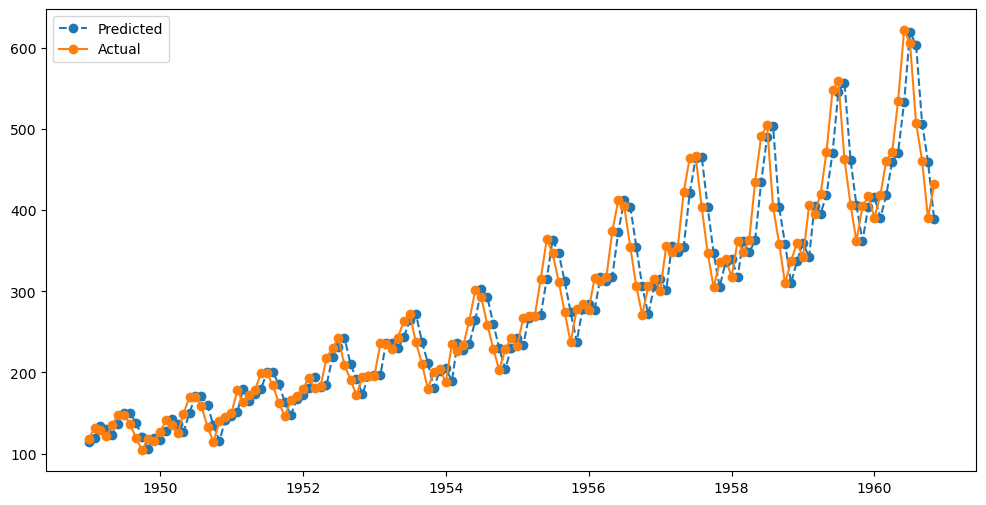

In [344]:
plt.figure(figsize=(12,6))
plt.plot(pred_df,linestyle='--',marker='o',label='Predicted')
plt.plot(data["t+1"], linestyle='-',marker='o',label='Actual')
plt.legend()

# SGD Model

In [345]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scale=scaler.fit_transform(data["Passengers"].values.reshape(-1,1))
y_scale=scaler.fit_transform(data["t+1"].values.reshape(-1,1))

X_scale=X_scale.reshape(-1,1,1)
y_scale=y_scale.reshape(-1,1,1)

split_index = int(len(data) * 0.8)
X_train_scale = X_scale[:split_index] 
X_test_scale = X_scale[split_index:] 
y_train_scale = y_scale[:split_index]
y_test_scale = y_scale[split_index:]

In [346]:
model_sgd = Sequential()
model_sgd.add(LSTM(units=6, activation='tanh', input_shape=(1, 1)))
model_sgd.add(Dense(units=1))
model_sgd.compile(optimizer=SGD(learning_rate=0.07), loss='mean_squared_error')

history = model_sgd.fit(X_train_scale, y_train_scale, epochs=50, batch_size=3)

Epoch 1/50
38/38 [==============================] - 2s 6ms/step - loss: 0.0473
Epoch 2/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0337
Epoch 3/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0266
Epoch 4/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0305
Epoch 5/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0246
Epoch 6/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0264
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0251
Epoch 8/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 9/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0246
Epoch 10/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0215
Epoch 11/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0245
Epoch 12/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0178
Epoch 13/50
38/38 [==============================

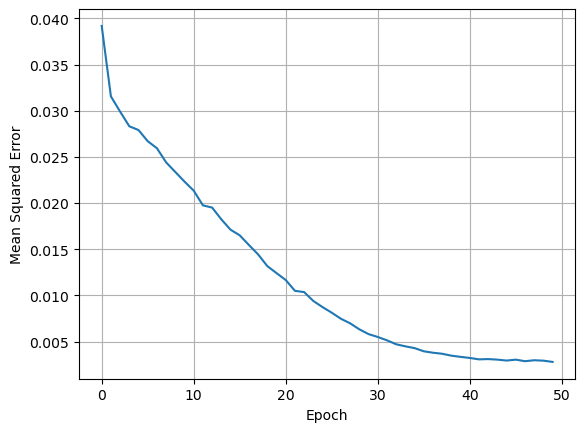

In [347]:
plt.plot(history.history['loss'], label='loss')
#plt.ylim([0, 10000])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

In [348]:
sd_pred=model_sgd.predict(X_test_scale)

sd_pred

array([[0.702686  ],
       [0.7223407 ],
       [0.57000846],
       [0.49487382],
       [0.4090191 ],
       [0.45678398],
       [0.49658555],
       [0.465511  ],
       [0.5732523 ],
       [0.55694795],
       [0.5957173 ],
       [0.6752413 ],
       [0.7796678 ],
       [0.7935963 ],
       [0.6619346 ],
       [0.5748712 ],
       [0.5000035 ],
       [0.5716315 ],
       [0.5909395 ],
       [0.5487174 ],
       [0.5941269 ],
       [0.658951  ],
       [0.6752413 ],
       [0.7628207 ],
       [0.86769545],
       [0.84977794],
       [0.7264893 ],
       [0.658951  ],
       [0.54706514]], dtype=float32)

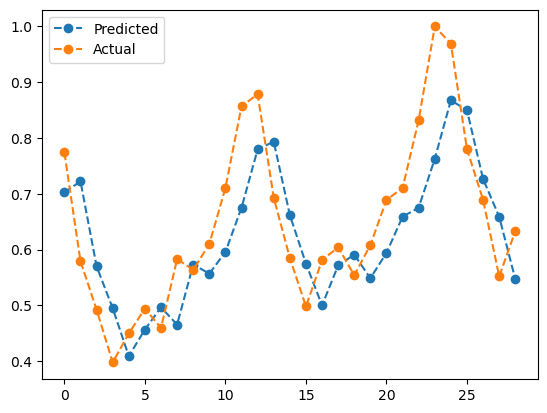

In [349]:
plt.plot(sd_pred.reshape(-1,1),marker='o',linestyle='--',label='Predicted')
plt.plot(y_test_scale.reshape(-1,1),marker='o',linestyle='--',label='Actual')
plt.legend()

In [350]:
sgd_pred=model_sgd.predict(X_scale)

In [351]:
sgd_pred=scaler.inverse_transform(sgd_pred)
sgd_pred_df=pd.DataFrame(sgd_pred,index=data.index)

In [352]:
sgd_pred_df

,0
Month,
1949-01-01,129.207779
1949-02-01,134.679565
1949-03-01,147.555130
1949-04-01,144.783997
1949-05-01,137.426208
...,...
1960-07-01,553.466248
1960-08-01,544.184937
1960-09-01,480.321472


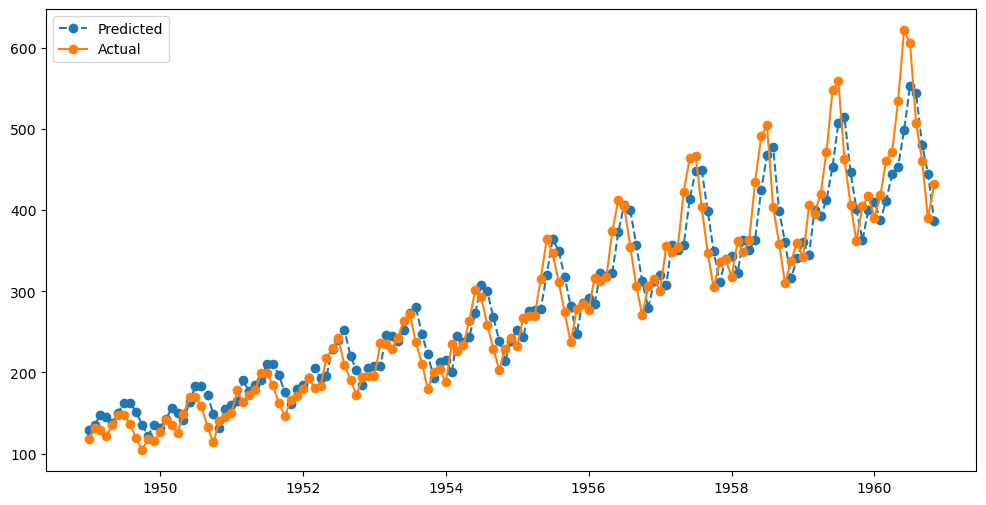

In [353]:
plt.figure(figsize=(12,6))
plt.plot(sgd_pred_df,linestyle='--',marker='o',label='Predicted')
plt.plot(data["t+1"], linestyle='-',marker='o',label='Actual')
plt.legend()